In [705]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

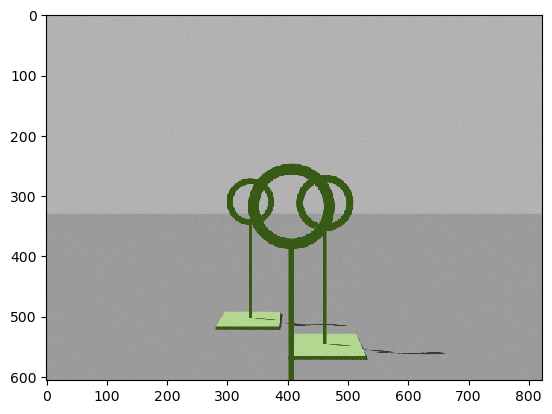

In [706]:
img = cv2.imread('images/image7.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

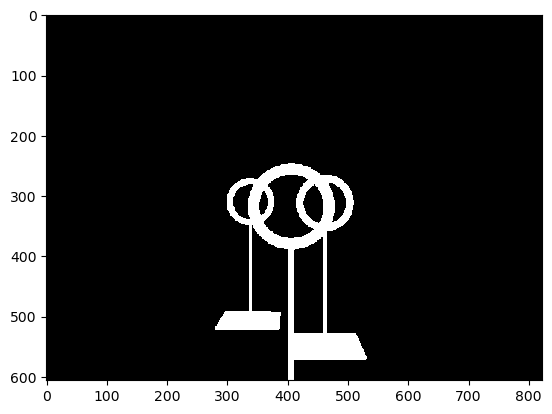

In [707]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
gates = cv2.inRange(img_hsv, (0, 20, 20), (179, 255, 255))
plt.imshow(gates, cmap='gray')
plt.show()

In [708]:
def largest_contour_with_child(img):
    contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    
    cont_arr = []
    for i, cont in enumerate(contours):
        # Has children?
        if hierarchy[0][i][2] > -1:
            cont_arr.append(cont)
    
    if len(cont_arr) == 0:
        return []

    sizes = []
    for cont in cont_arr:
        sizes.append(cv2.contourArea(cont))

    largest = cont_arr[np.argmax(sizes)]
    return largest

def test_defects(cont):
    hull = cv2.convexHull(cont,returnPoints = False)
    defects = cv2.convexityDefects(cont,hull)

    if  defects is None:
        return False

    dist =  defects[0][0][3]/256.0

    if dist > 4:
        return False

    return True

def sep_closest_gate(img):
    kernel = np.ones((4,4),np.uint8)

    for i in range(50):
        cont = largest_contour_with_child(img)
        
        if len(cont) == 0:
            img = cv2.dilate(img, kernel, iterations = 1)
            break
        
        if test_defects(cont):
            break
        img = cv2.erode(img, kernel, iterations = 1)

    return img

def sep_closest_gate2(img):
    kernel = np.ones((4,4),np.uint8)
    test_img = img.copy()
    index = 0
    for i in range(50):
        test_img = cv2.erode(test_img, kernel, iterations = i)
        cont = largest_contour_with_child(test_img)
        if len(cont) == 0:
            index = i
            break
        else:
            test_img = cv2.dilate(test_img, kernel, iterations = i)

    img = cv2.erode(img, kernel, iterations = index - 1)
    return img




def preprocess(filename):
    f = os.path.join('images', filename)
    img = cv2.imread(f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    gates = cv2.inRange(img_hsv, (0, 20, 20), (179, 255, 255))

    return gates

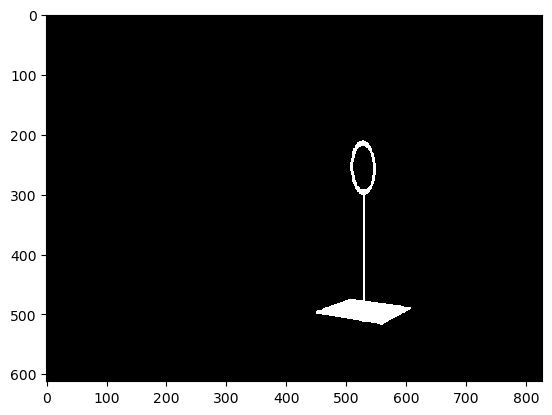

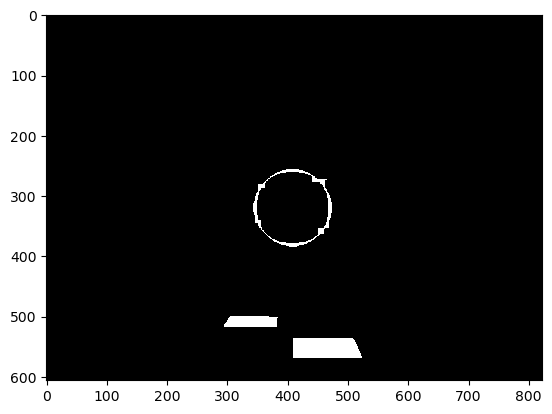

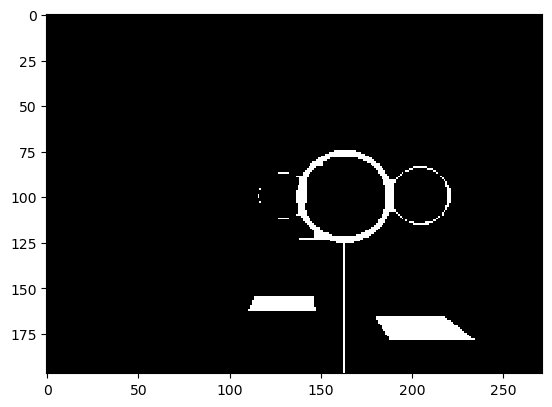

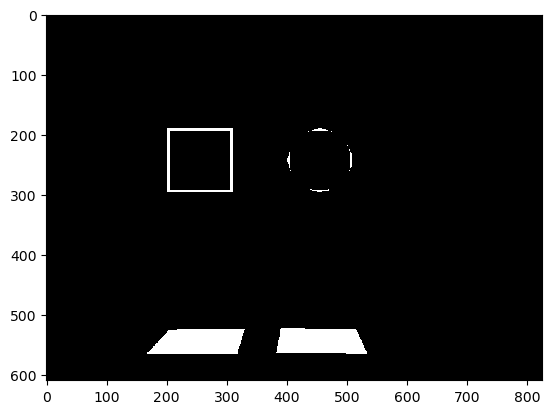

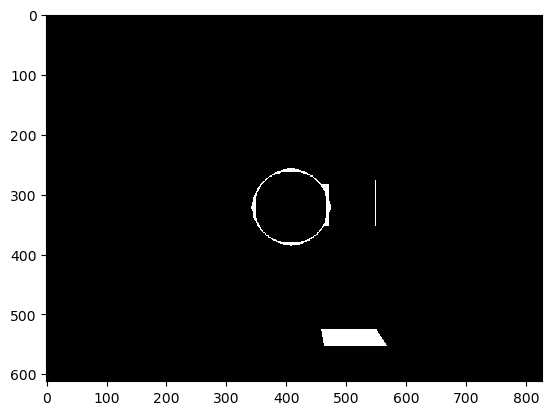

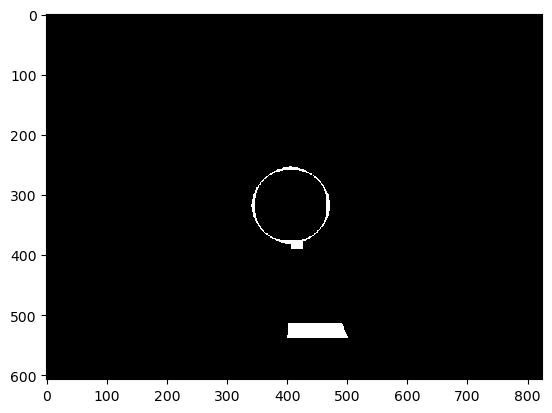

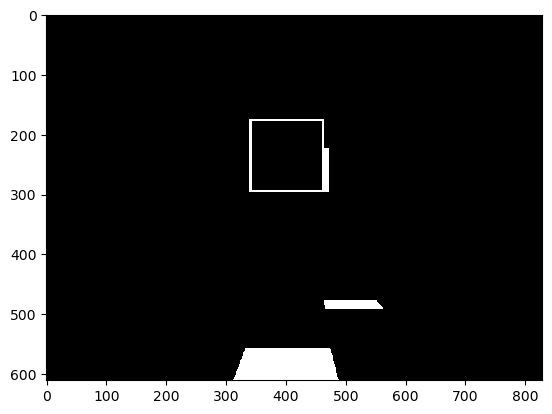

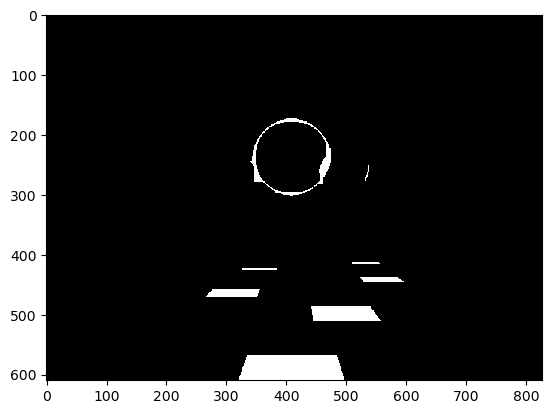

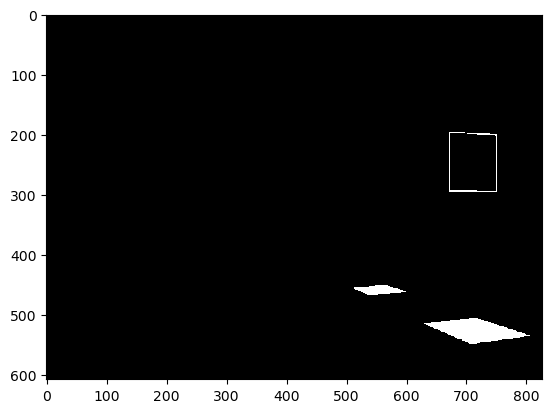

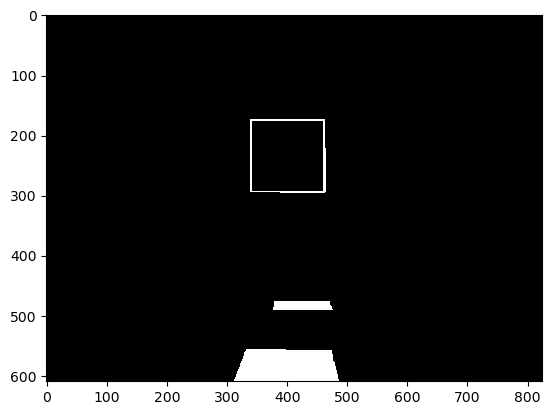

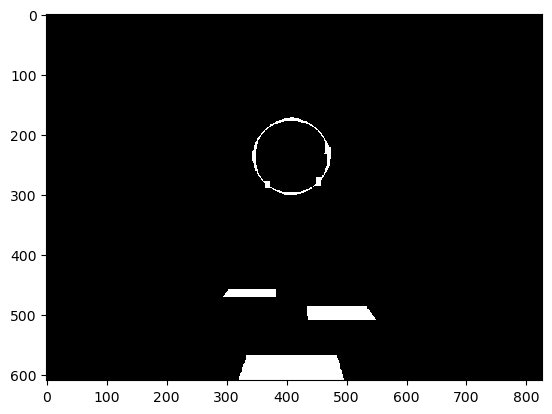

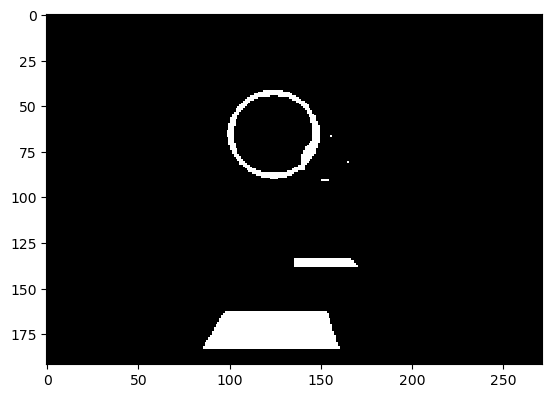

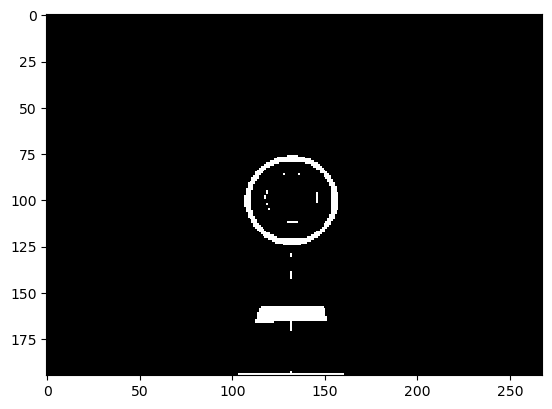

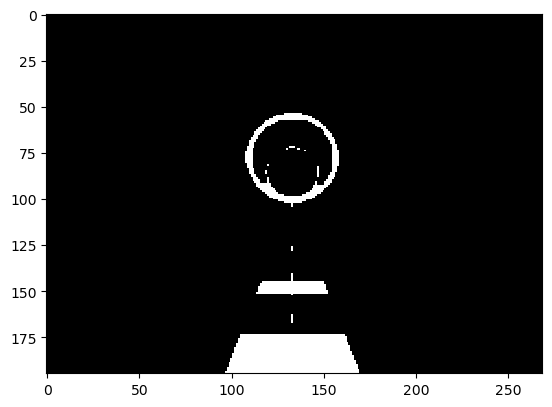

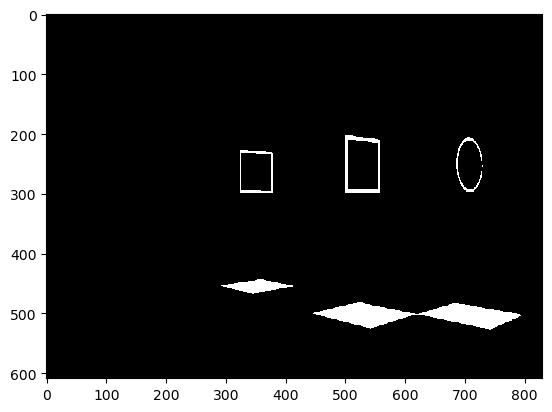

In [709]:
for filename in os.listdir('images'):
    gates = preprocess(filename)
    closest_gate = sep_closest_gate2(gates)
    plt.imshow(closest_gate, cmap='gray')
    plt.show()

In [710]:
closest_gate = sep_closest_gate(gates)

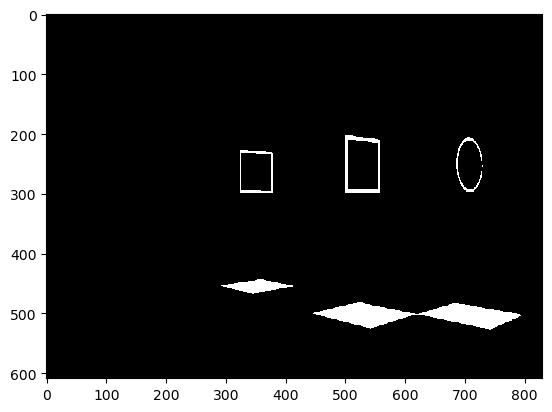

In [711]:
plt.imshow(closest_gate, cmap='gray')
plt.show()